# Wind Farm: Offshore-WA-OR

In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15})

## 1.- Load file

In [3]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR'
filename = 'windpark_Offshore_WA_OR_turbine_25915.csv'

In [4]:
parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
turbine_25915 = pd.read_csv(os.path.join(path, filename),
                            sep=';',
                            parse_dates=['Date(YYYY-MM-DD hh:mm:ss)'],
                            date_parser=parse,
                            index_col=0)

In [5]:
turbine_25915.index.names = ['date']
turbine_25915 = turbine_25915.rename(columns={'100m wind speed (m/s)': 'wind_speed_100m_m/s',
                                              ' rated power output at 100m (MW)': 'rated_power_output_100m_MW' ,
                                              ' SCORE-lite power output at 100m (MW)': 'SCORE-lite_power_100m_MW',
                                              'CorrectedScore': 'Corrected_Score'})
turbine_25915.head()

,wind_speed_100m_m/s,rated_power_output_100m_MW,SCORE-lite_power_100m_MW,Corrected_Score
date,,,,
2004-01-01 00:00:00,7.41,7.146,8.867,8.867
2004-01-01 00:10:00,7.10,6.204,1.409,1.409
2004-01-01 00:20:00,6.96,5.775,5.859,5.859
2004-01-01 00:30:00,6.65,5.055,4.745,4.745
2004-01-01 00:40:00,6.78,5.361,5.829,5.829


## 2.- Hour time serie

In [8]:
turbine_25915_H = turbine_25915.resample('H').mean()
turbine_25915_H.head()

,wind_speed_100m_m/s,rated_power_output_100m_MW,SCORE-lite_power_100m_MW,Corrected_Score
date,,,,
2004-01-01 00:00:00,6.961667,5.8535,5.199333,5.199333
2004-01-01 01:00:00,5.278333,3.1700,2.795333,2.795333
2004-01-01 02:00:00,5.316667,2.8850,2.409667,2.409667
2004-01-01 03:00:00,4.928333,2.2385,2.247167,2.247167
2004-01-01 04:00:00,4.053333,2.2575,1.991167,1.991167


## 3.- Lag or wind size selection

### 3.1.- Soft-models

In [32]:
# selct only the wind speep at 100 m
turbine_25915_H_wind = turbine_25915_H[['wind_speed_100m_m/s']]

# create a df for all rolling mean
df_lag = pd.DataFrame(index=turbine_25915_H.index)

# emply list for all df
df_rolling_mean = []
df_rolling_mean.append(turbine_25915_H_wind)

# calcul all rolling mean
for freq in [3, 6, 12, 24, 30, 36, 42, 48]:
    df_rolling = turbine_25915_H_wind.rolling(window=freq).mean()
    df_rolling.columns = ['rolling={0}'.format(freq)]
    df_rolling_mean.append(df_rolling)
    
# concar all dataframe    
df_lag = pd.concat(df_rolling_mean, axis=1)

df_lag.head(50)

,wind_speed_100m_m/s,rolling=3,rolling=6,rolling=12,rolling=24,rolling=30,rolling=36,rolling=42,rolling=48
date,,,,,,,,,
2004-01-01 00:00:00,6.961667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 01:00:00,5.278333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 02:00:00,5.316667,5.852222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 03:00:00,4.928333,5.174444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 04:00:00,4.053333,4.766111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 05:00:00,3.946667,4.309444,5.080833,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 06:00:00,4.190000,4.063333,4.618889,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 07:00:00,4.891667,4.342778,4.554444,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 08:00:00,5.160000,4.747222,4.528333,NaN,NaN,NaN,NaN,NaN,NaN


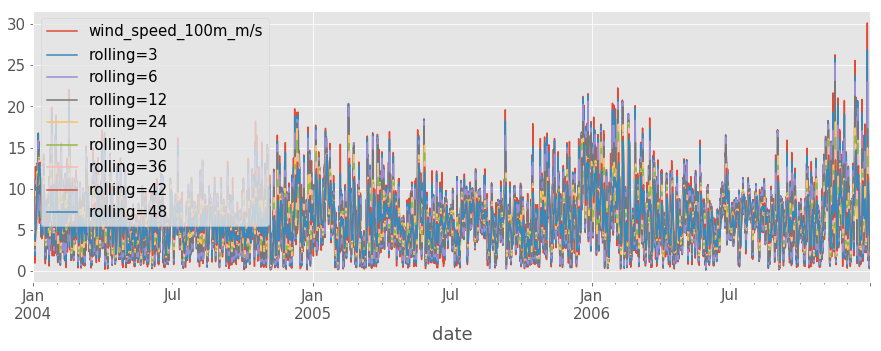

In [34]:
df_lag.plot(figsize=(15,5));

In [35]:
# coeficient correlation
df_corr = df_lag.corr()
df_corr

,wind_speed_100m_m/s,rolling=3,rolling=6,rolling=12,rolling=24,rolling=30,rolling=36,rolling=42,rolling=48
wind_speed_100m_m/s,1.000000,0.973507,0.916113,0.810344,0.660769,0.608239,0.564533,0.530505,0.505092
rolling=3,0.973507,1.000000,0.968862,0.869294,0.710823,0.654159,0.606854,0.569118,0.540750
rolling=6,0.916113,0.968862,1.000000,0.939820,0.780760,0.719541,0.667944,0.625503,0.592809
rolling=12,0.810344,0.869294,0.939820,1.000000,0.895811,0.832780,0.776877,0.728527,0.688718
rolling=24,0.660769,0.710823,0.780760,0.895811,1.000000,0.978498,0.936193,0.890126,0.846508
rolling=30,0.608239,0.654159,0.719541,0.832780,0.978498,1.000000,0.982661,0.947159,0.907430
rolling=36,0.564533,0.606854,0.667944,0.776877,0.936193,0.982661,1.000000,0.985585,0.955345
rolling=42,0.530505,0.569118,0.625503,0.728527,0.890126,0.947159,0.985585,1.000000,0.987792
rolling=48,0.505092,0.540750,0.592809,0.688718,0.846508,0.907430,0.955345,0.987792,1.000000


In [38]:
ps_corr = df_corr.iloc[0,:]
ps_corr

wind_speed_100m_m/s    1.000000
rolling=3              0.973507
rolling=6              0.916113
rolling=12             0.810344
rolling=24             0.660769
rolling=30             0.608239
rolling=36             0.564533
rolling=42             0.530505
rolling=48             0.505092
Name: wind_speed_100m_m/s, dtype: float64

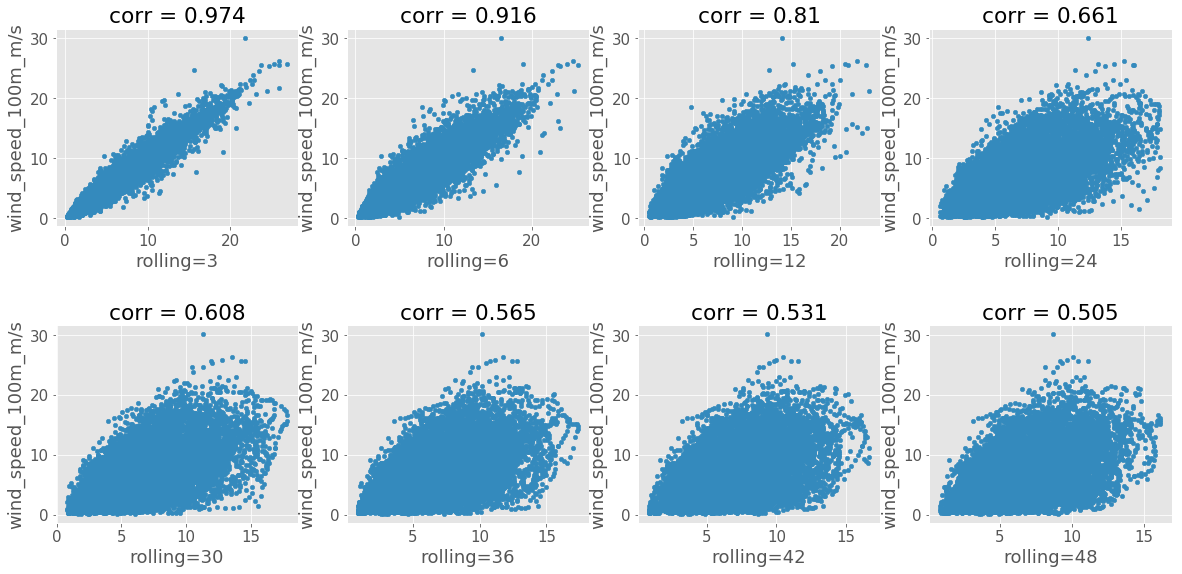

In [43]:
f = plt.figure(figsize=(20,20))
for i, col in enumerate(df_corr.columns[1:]):
    i=i+1
    ax = f.add_subplot(4,4,i)
    f.subplots_adjust(hspace=.5)
    df_lag.plot(ax=ax, kind='scatter', x=col, y='wind_speed_100m_m/s', 
                title='corr = {0}'.format(round(ps_corr[i],3)))